In [73]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix,accuracy_score, classification_report,f1_score

In [4]:
df=pd.read_csv("/content/drive/My Drive/Dataset/micro credit/Data file.csv")
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

EDA

In [6]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

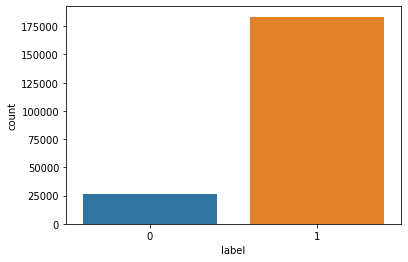

In [7]:
sns.countplot(df['label'])

In [8]:
data = [df]
for column in data:
    column.loc[column["rental30"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["rental30"] > 0) & (column["rental30"] <= 19766), 'balance_group'] = 'low balance'
    column.loc[(column["rental30"] > 19766) & (column["rental30"] <= 118572), 'balance_group'] = 'average balance'
    column.loc[(column["rental30"] > 118572), 'balance_group'] = 'high balance'

In [9]:
count_balance = pd.crosstab(df['label'],df['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance = count_balance.transpose()


In [10]:
balance = pd.DataFrame(df['balance_group'].value_counts())
balance['% Subscription'] = count_balance[1]
balance.drop('balance_group',axis = 1,inplace = True)

balance['balance'] = [1,2,0,3]
balance = balance.sort_values('balance',ascending = True)


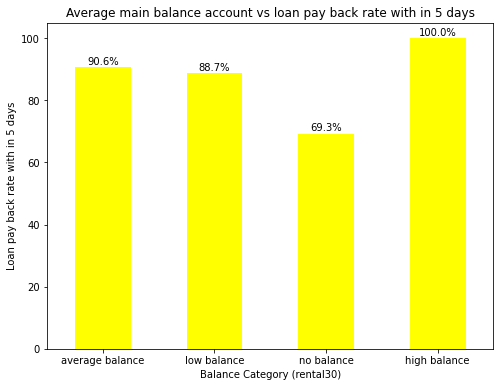

In [11]:
plot_balance = balance['% Subscription'].plot(kind = 'bar',color = ('yellow'),figsize = (8,6))
plt.title('Average main balance account vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Balance Category (rental30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      balance['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, rec.get_height() + 1,label+'%',ha ='center',color='black')
    

From above bar plot we can observe that how customers with different main balance levels are paying back the loan with in five days. The high balance level people are with 100% rate i.e they are paying loan within 5 days. Coming to the average and low balance people it is observed that around 10%-12% of people are not paying the loan within 5 days.
Coming to low balance level people, it is observed that around 30% of people are not paying back the loan with in 5 days of time. The 30% of people with no balance or negative balance people are creating a major loss to the company without paying back the loan within five days of time.

In [12]:
data = [df]
for column in data:
    column.loc[column["fr_ma_rech30"] <=0,  'frequency_group'] = 'no frequency'
    column.loc[(column['fr_ma_rech30'] > 0) & (column['fr_ma_rech30'] <=1 ), 'frequency_group'] = 'low frequency'
    column.loc[(column['fr_ma_rech30'] >1) & (column['fr_ma_rech30'] <=2), 'frequency_group'] = 'medium frequency'
    column.loc[(column['fr_ma_rech30'] >2), 'frequency_group'] = 'high frequency'

In [13]:
count_fre = pd.crosstab(df['label'],df['frequency_group']).apply(lambda x: x/x.sum() * 100)
count_fre = count_fre.transpose()

In [14]:
fre = pd.DataFrame(df['frequency_group'].value_counts())
fre['% Subscription'] = count_fre[1]
fre.drop('frequency_group',axis = 1,inplace = True)

fre['fre'] = [1,2,0,3]
fre= fre.sort_values('fre',ascending = True)


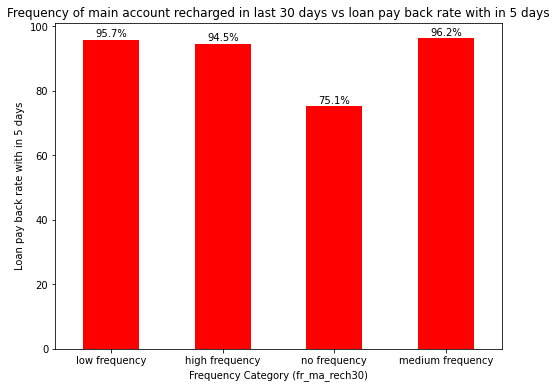

In [15]:
plot_fre = fre['% Subscription'].plot(kind = 'bar',color = ('red'),figsize = (8,6))

plt.title('Frequency of main account recharged in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Frequency Category (fr_ma_rech30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre.patches,
                      fre['% Subscription'].round(1).astype(str)):
    plot_fre.text(rec.get_x() + rec.get_width()/2, rec.get_height() + 1, label+'%',  ha = 'center',color = 'black')

From above bar plot we can observe that how customers with different frequency levels (main account recharge) are paying back the loan within five days. The is no 100% rate in any of the frequency levels to pay back the loan within 5 days. Coming to the average and low & medium frequency people it is observed that around 5%-6% of people are not paying the loan within 5 days.
Coming to low frequency level people, it is observed that around 25% of people are not paying back the loan with in stipulated 5 days of time. The 25% people who are not getting their main account recharge for 30 days creating a major loss to the company without paying back the loan within five days of time.

In [16]:
dat = [df]
for column in data:
    column.loc[column["cnt_loans30"] <=0,  'loan_frequency_group'] = 'no loans'
    column.loc[(column['cnt_loans30'] > 0) & (column['cnt_loans30'] <=1 ), 'loan_frequency_group'] = 'low num of loans'
    column.loc[(column['cnt_loans30'] >1) & (column['cnt_loans30'] <=4), 'loan_frequency_group'] = 'medium num of loans'
    column.loc[(column['cnt_loans30'] >4), 'loan_frequency_group'] = 'high num of loans'

In [17]:
count_loan = pd.crosstab(df['label'],df['loan_frequency_group']).apply(lambda x: x/x.sum() * 100)
count_loan= count_loan.transpose()

In [18]:
fre = pd.DataFrame(df['loan_frequency_group'].value_counts())
fre['% Subscription'] = count_loan[1]
fre.drop('loan_frequency_group',axis = 1,inplace = True)

fre['fre'] = [1,2,0,3]
fre= fre.sort_values('fre',ascending = True)

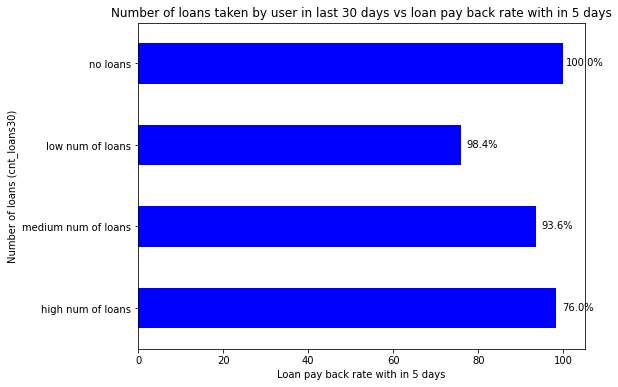

In [19]:
plot_fre = fre['% Subscription'].plot(kind = 'barh', color = ('blue'), figsize = (8,6))
                                              
plt.title('Number of loans taken by user in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Number of loans (cnt_loans30)')
plt.xlabel('Loan pay back rate with in 5 days')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre.patches,
                      fre['% Subscription'].round(1).sort_values(ascending = True).round(1).astype(str)):
    plot_fre.text(rec.get_width()+5,rec.get_y()+ rec.get_height()-0.3,label+'%',ha = 'center',va='bottom') 
    

From above bar plot we can observe that how customers with different loans levels taken are paying back the loan within five days. In the data set people not taken loans are labelled as ‘1’. So we should not consider the people with no loans labelled in the above graph.Considering the remaining levels, there is no 100% rate in any of the loan levels to pay back the loan within 5 days. Coming to the high number of loan level people it is observed that around 25% of people are not paying the loan within 5 days. Only 2% of the people from low number of loans category are not paying the loan within 5 days. This is followed by the people with medium number of loans having defaulters of 7% approximately.

In [20]:
data = [df]
for column in data:
    column.loc[column["amnt_loans30"] <=0,  'loanamnt_frequency_group'] = 'no loans'
    column.loc[(column['amnt_loans30'] > 0) & (column['amnt_loans30'] <=6 ), 'loanamnt_frequency_group'] = 'low amnt of loans'
    column.loc[(column['amnt_loans30'] >6) & (column['amnt_loans30'] <=24), 'loanamnt_frequency_group'] = 'medium amnt of loans'
    column.loc[(column['amnt_loans30'] >24), 'loanamnt_frequency_group'] = 'high amnt of loans'

In [21]:
count_loanamnt = pd.crosstab(df['label'],df['loanamnt_frequency_group']).apply(lambda x: x/x.sum() * 100)
count_loanamnt = count_loanamnt.transpose()

In [22]:
fre= pd.DataFrame(df['loanamnt_frequency_group'].value_counts())
fre['% Subscription'] = count_loanamnt[1]
fre.drop('loanamnt_frequency_group',axis = 1,inplace = True)

fre['fre'] = [1,2,0,3]
fre= fre.sort_values('fre',ascending = True)

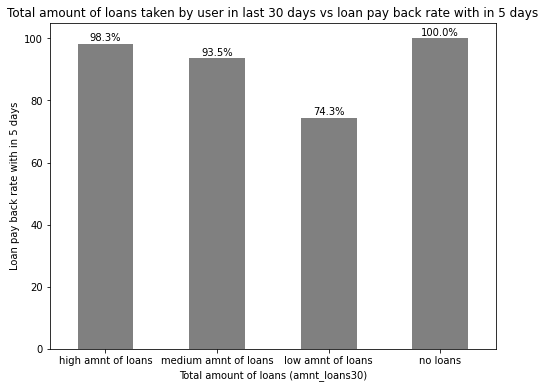

In [23]:
plot_fre = fre['% Subscription'].plot(kind = 'bar',color = ('grey'), figsize = (8,6))
                                               
plt.title('Total amount of loans taken by user in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Total amount of loans (amnt_loans30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre.patches,
                      fre['% Subscription'].round(1).astype(str)):
    plot_fre.text(rec.get_x() + rec.get_width()/2,rec.get_height() + 1,label+'%',ha = 'center', color = 'black') 
                                         

In [24]:
df['pcircle'].unique()

array(['UPW'], dtype=object)

In [25]:
# As 'Unnamed: 0','msisdn', 'pcircle', 'pdate' features are not having much importance, we can ignore them. 
# And also removing the extra columns created for the visualization part

df.drop(['Unnamed: 0','msisdn', 'pcircle', 'pdate','balance_group','frequency_group','loan_frequency_group','loanamnt_frequency_group'],axis=1,inplace=True)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


# Check for the correlation with the dependent variable 'Label

In [26]:
corr_data = df
corr = corr_data.corr()
corr

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.205793,0.120855,0.039300,0.003827,-0.000027,0.002999,-0.005418,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564,0.000892,0.001121,0.005395,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078299,0.762981,0.257847,0.037495,0.000700,-0.001499,0.038814,0.020673,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000661,-0.001570,0.031155,0.016437,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033530,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.072255,0.046761,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548,-0.002345,0.056282,0.036886,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,0.002876,0.440821,0.794646,-0.002342,0.016707,0.106267,0.418735,0.818734,0.124646,-0.001837,-0.003230,0.014779,0.016042,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,0.001669,0.656986,-0.011792,0.000082,0.886433,-0.152759,0.584060,-0.051347,0.013463,0.002306,-0.002732,0.011981,0.006989,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


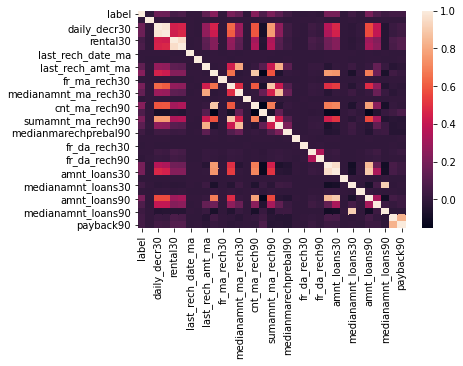

In [27]:
corr_data = df
corr = corr_data.corr()
sns.heatmap(corr,annot_kws={'size':10})

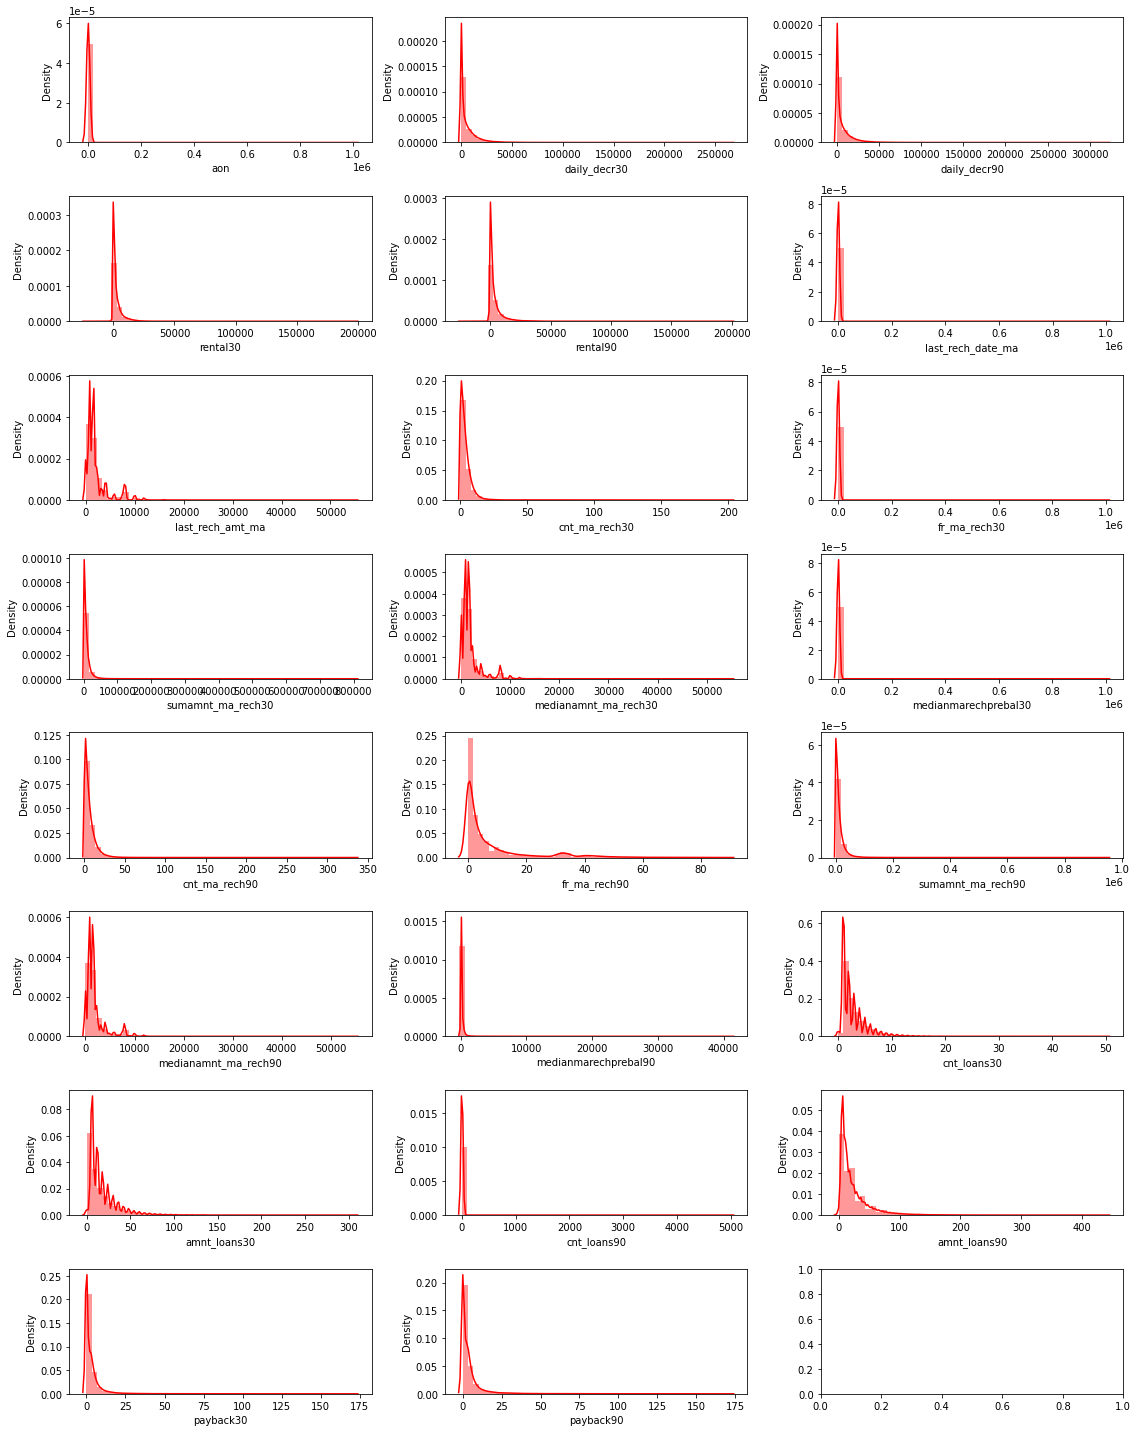

In [28]:
columns=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'payback30', 'payback90']
fig,ax = plt.subplots(8,3,figsize=(16,20))
ax = ax.flatten()
for i,col in enumerate(columns):
    sns.distplot(df[col],ax=ax[i],color='red')
plt.tight_layout()
plt.show()

In [29]:
loan=df.copy()
loan

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [30]:
from scipy.stats import zscore
columns=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']
for i in range(len(columns)):
    loan[columns[i]]=zscore(loan[columns[i]])
    for j in range(len(loan[columns[i]])):
        if loan[columns[i]][j]>3 or loan[columns[i]][j]<-3:
            loan[columns[i]].replace(loan[columns[i]][j],loan[columns[i]].median(),inplace=True)
    loan[columns[i]]=np.cbrt((loan[columns[i]]))

In [31]:
loan.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,-0.461641,-0.296838,-0.310291,-0.310725,-0.317301,-0.411270,-0.411209,-0.332091,-0.198087,-0.411338,-0.243943,-0.315369,-0.410688,-0.244404,-0.349913,-0.266164,-0.321098,-0.291997,-0.396670,-0.411308,-0.434759,-0.362602,-0.223886,-0.238309,-0.397509,-0.568912,-0.395007,-0.263523,-0.433195,-0.560274,-0.303275,-0.325247
std,0.330519,0.010513,0.750761,0.734700,0.732641,0.721568,0.000352,0.000261,0.725188,0.798006,0.000200,0.754215,0.720378,0.024383,0.784411,0.748019,0.747401,0.718466,0.505550,0.034837,0.000016,0.253085,0.037775,0.801905,0.775996,0.033471,0.329861,0.083079,0.768254,0.683906,0.312250,0.618507,0.617527
min,0.000000,-0.475932,-0.840478,-0.826989,-1.390813,-1.416363,-0.412545,-0.412311,-0.954929,-0.977733,-0.411480,-0.912518,-0.956609,-0.421767,-0.957536,-0.849443,-0.902602,-0.963956,-0.924799,-0.397398,-0.411308,-0.470831,-0.363546,-1.026001,-1.010858,-0.401449,-0.628102,-0.435135,-0.963087,-0.693970,-0.612332,-0.727875,-0.748431
25%,1.000000,-0.470147,-0.833488,-0.820887,-0.824183,-0.820129,-0.411452,-0.411243,-0.817332,-0.887785,-0.411480,-0.847148,-0.795584,-0.414315,-0.843391,-0.849443,-0.842447,-0.806398,-0.594112,-0.397398,-0.411308,-0.470831,-0.363546,-0.883050,-0.882673,-0.398504,-0.628102,-0.427158,-0.873562,-0.693970,-0.612332,-0.727875,-0.748431
50%,1.000000,-0.464481,-0.751430,-0.748703,-0.720126,-0.719509,-0.411379,-0.411243,-0.605175,-0.612517,-0.411407,-0.671963,-0.509453,-0.413490,-0.685327,-0.768610,-0.674377,-0.538793,-0.533379,-0.397398,-0.411308,-0.470831,-0.363546,-0.667281,-0.699639,-0.398504,-0.628102,-0.418872,-0.760562,-0.693970,-0.612332,-0.727875,-0.636237
75%,1.000000,-0.455533,0.503735,0.438001,0.424411,0.383011,-0.411233,-0.411243,-0.389834,0.621545,-0.411260,0.565072,-0.355217,-0.411764,0.616383,0.282291,0.542383,-0.399868,-0.336161,-0.397398,-0.411308,-0.470831,-0.363546,0.455249,0.703379,-0.398504,-0.628102,-0.391807,0.621507,-0.693970,-0.612332,0.225581,-0.190698
max,1.000000,-0.421596,1.442229,1.442203,1.442220,1.442244,-0.407320,-0.406952,1.357865,1.413584,-0.410081,1.442055,1.440282,0.760559,1.422011,1.436018,1.442207,1.433761,1.441959,1.441658,-0.410392,1.340909,1.271191,1.415245,1.403495,1.441541,1.269380,0.615742,1.435835,1.360402,1.312657,1.442129,1.441538


In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
vif= pd.DataFrame()
vif['Features'] = loan.columns
vif['vif']=[variance_inflation_factor(loan.values,i) for i in range(loan.shape[1])]


In [34]:
vif[vif['vif']>4]

,Features,vif
0,label,9.392739e+00
1,aon,1.969634e+03
2,daily_decr30,1.249496e+01
3,daily_decr90,1.301844e+01
4,rental30,6.181708e+00
5,rental90,6.725437e+00
6,last_rech_date_ma,1.740982e+06
7,last_rech_date_da,4.392228e+06
9,cnt_ma_rech30,4.532500e+00
10,fr_ma_rech30,6.089060e+06


Using Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone.
From the above results we can see that there are  many features having strong multicollinearity in the data set. This resembles that there is need to go for PCA (Principal Component Analysis).
If we won’t perform PCA the noise or correlation between the independent variables will affect the model prediction and model results. More than 50% of the features are having vif >4 so it is mandatory to perform PCA in order to reduce the multicollinearity effect among the independent variables.

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca=PCA()
pca.fit(loan)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [37]:
data_pca= pca.transform(loan)

In [38]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.36106899, 0.51696053, 0.61071441, 0.68775447, 0.73900346,
       0.78156818, 0.81938597, 0.84976473, 0.87295041, 0.89373728,
       0.91086954, 0.92731904, 0.94114312, 0.95060715, 0.95952021,
       0.96698043, 0.97387131, 0.9800014 , 0.98589721, 0.99087696,
       0.99404692, 0.99660267, 0.99905098, 0.99957184, 0.99970924,
       0.99982621, 0.99993411, 0.99998954, 0.99999998, 0.99999999,
       1.        , 1.        , 1.        ])

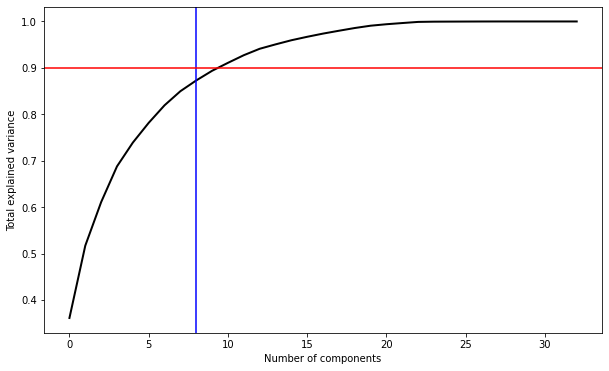

In [39]:
plt.figure(figsize=(10,6))

plt.plot(range(0,33), cumsum, color='k', lw=2)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.axvline(8, c='b')
plt.axhline(0.9, c='r')

plt.show()


In [40]:
cov_matrix = np.cov(loan.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.09242643e-01  2.69944709e-04  5.08868517e-02 ...  2.39251438e-03
   3.22521218e-02  2.87475043e-02]
 [ 2.69944709e-04  1.10530498e-04  5.96454189e-04 ... -4.78234527e-06
   1.28083927e-04  2.12521954e-04]
 [ 5.08868517e-02  5.96454189e-04  5.63641611e-01 ... -5.15869914e-03
   8.82617731e-02  8.98069755e-02]
 ...
 [ 2.39251438e-03 -4.78234527e-06 -5.15869914e-03 ...  9.75001146e-02
  -2.13322228e-03  1.83662697e-03]
 [ 3.22521218e-02  1.28083927e-04  8.82617731e-02 ... -2.13322228e-03
   3.82551451e-01  3.02046363e-01]
 [ 2.87475043e-02  2.12521954e-04  8.98069755e-02 ...  1.83662697e-03
   3.02046363e-01  3.81340038e-01]]


In [41]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [42]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]


In [43]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 36.1068992   51.69605293  61.07144078  68.77544735  73.90034621
  78.15681787  81.93859739  84.97647316  87.29504076  89.373728
  91.08695446  92.73190416  94.11431174  95.06071525  95.95202097
  96.6980435   97.38713067  98.00013994  98.58972082  99.08769628
  99.40469188  99.6602671   99.90509834  99.95718414  99.97092401
  99.98262146  99.99341135  99.99895399  99.99999841  99.99999936
  99.99999973 100.         100.        ]


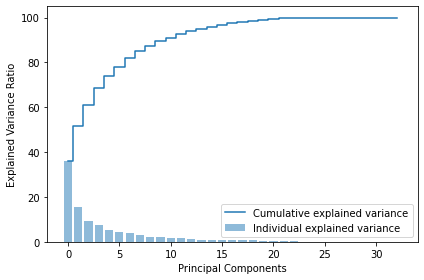

In [44]:
plt.figure(figsize=(6 , 4))
plt.bar(range(33), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(33), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [46]:
pca = PCA(n_components=13)
pca.fit(loan)
data_pca = pd.DataFrame(pca.transform(loan))
data_pca.shape

(209593, 13)

In [47]:
x=data_pca
y=loan['label']

In [48]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(146715, 13)
(62878, 13)
(146715,)
(62878,)


# LogisticRegression


In [49]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
print('Training score =', model1.score(x_train, y_train))
print('Test score =', model1.score(x_test, y_test))

Training score = 0.8861397948403367
Test score = 0.8876554597792551


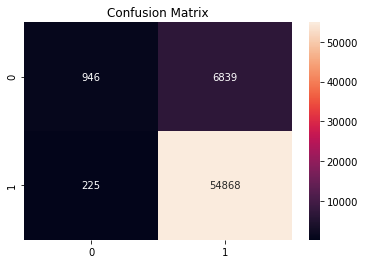

In [51]:
from sklearn.metrics import confusion_matrix
ypred = model1.predict(x_test)
cm = confusion_matrix(y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [52]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.8876554597792551
Precision = 0.8891697862479135
Recall = 0.9959159965875882
F1 Score = 0.9395205479452055


ROC AUC = 0.8665030850328039


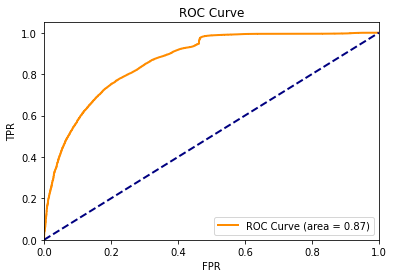

In [53]:
ypred = model1.predict_proba(x_test)
fpr,tpr,threshold = roc_curve(y_test,ypred[:,1])
roc_auc = roc_auc_score(y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

From the above results it is observed that all the metrics accuracy, precision, recall and f1-score are good.Different classification algorithms (K-Neighbours Classifier,BaggingClassifier, Decision Tree Classifier, and Gaussian NB, Random Forest) were run on the dataset through K-fold cross validation and the best-performing one was (identified by observing bias and variance errors) and used to build the classification model.

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier

#KNN

In [55]:
from sklearn.model_selection import RandomizedSearchCV
knn=KNeighborsClassifier()
param={'n_neighbors':np.arange(5,30),'weights':['uniform','distance']}
RS=RandomizedSearchCV(knn,param,cv=3,scoring='f1_weighted',n_jobs=-1)
RS.fit(x_train,y_train)
print(RS.best_params_)

{'weights': 'uniform', 'n_neighbors': 6}


#Decision Tree

In [56]:
dt=DecisionTreeClassifier(random_state=0)

In [57]:
param={'max_depth':np.arange(3,50),'criterion':['entropy','gini'],'min_samples_leaf':np.arange(3,20)}
RS=RandomizedSearchCV(dt,param,cv=3,scoring='f1_weighted')
RS.fit(x_train,y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=0,
             

In [58]:
RS.best_params_

{'criterion': 'entropy', 'max_depth': 46, 'min_samples_leaf': 19}

#Random Forest

In [59]:
from sklearn import model_selection

RF_var=[]
for val in np.arange(1,50):
  RF=RandomForestClassifier(criterion='gini',n_estimators=val,random_state=0)
  kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
  cv_results = model_selection.cross_val_score(RF, x_train,y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
  RF_var.append(np.var(cv_results,ddof=1))

In [60]:
np.argmin(RF_var)

12

#Bagging Classifier

In [61]:
Bag_var=[]
for val in np.arange(1,20):
  Bag=BaggingClassifier(n_estimators=val,random_state=0)
  kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
  cv_results = model_selection.cross_val_score(Bag, x_train,y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
  Bag_var.append(np.var(cv_results,ddof=1))

In [62]:
np.argmin(Bag_var)

18

In [63]:
LR=LogisticRegression()
NB=GaussianNB()
KNN=KNeighborsClassifier(n_neighbors=5,weights='distance')
DT=DecisionTreeClassifier(criterion='gini',max_depth=14,min_samples_leaf=19,random_state=0)
RF=RandomForestClassifier(criterion='entropy',n_estimators=7,random_state=0)
Bag=BaggingClassifier(n_estimators=3,random_state=0)

In [64]:
models = []
models.append(('Logistic', LR))
models.append(('NaiveBayes', NB))
models.append(('KNN',KNN))
models.append(('DecisionTree',DT))
models.append(('RandomForest',RF))
models.append(('BaggingClassifier',Bag))

Logistic: 0.847968 (0.000006)
NaiveBayes: 0.818116 (0.000001)
KNN: 0.950553 (0.000000)
DecisionTree: 0.949900 (0.000000)
RandomForest: 0.959107 (0.000000)
BaggingClassifier: 0.953642 (0.000000)


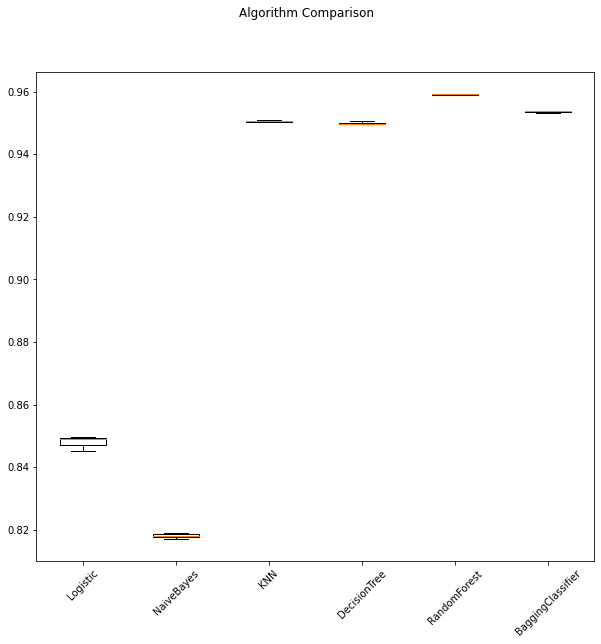

In [65]:
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = model_selection.cross_val_score(model, x_train, y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
	results.append(cv_results)
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(cv_results),np.var(cv_results,ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure(figsize=(10,9))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,rotation=45)
plt.show()

From the above results it is observed that Random Forest is the best performing model. By comparing all algorithms bias error and variance error, random forest is observed to be the best so it would be used to predict loan defaulters. The test of random forest with base estimator (Decision Tree (which is default for random forest), n_estimators=7) model successfully achieved a weighted F1_score of 95%, suggesting high level of strength of this model to classify loan defaulter’s.

# Random Forest

In [66]:
RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=7,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [67]:
predictions = RF.predict(x_test)

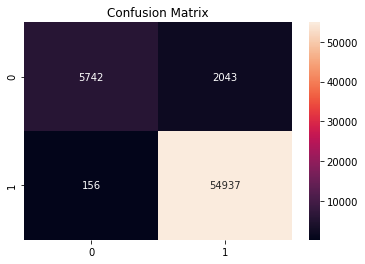

In [68]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [69]:
# Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84      7785
           1       0.96      1.00      0.98     55093

    accuracy                           0.97     62878
   macro avg       0.97      0.87      0.91     62878
weighted avg       0.97      0.97      0.96     62878



In [70]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.9650275135977607
Precision = 0.9641453141453141
Recall = 0.9971684243007278
F1 Score = 0.9803788602071865


ROC AUC = 0.9281778270854231


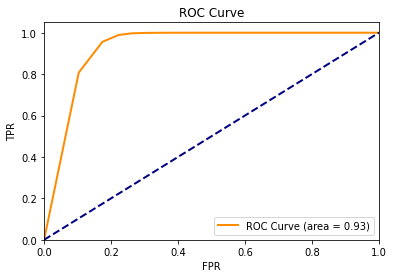

In [72]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = RF.predict_proba(x_test)
fpr,tpr,threshold = roc_curve(y_test,ypred[:,1])
roc_auc = roc_auc_score(y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

I choose RandomForestClassifier as my final model because it give good accuracy_score.